In [1]:
# Name: example_attenuation_measurement.ipynb
# Authors: Stephan Meighen-Berger
# Shows an example how to run an attenuation analysis

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import pickle
from tqdm import tqdm
from scipy.interpolate import UnivariateSpline

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['class'] = 'Calibration'
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec_Func",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 1.
}
# The flasher position
config['calibration']['pos_arr'] = [2., 30.]
# The injected pulse
norm_flash = 1e8
config['calibration']['light curve'] = {
    396.: np.ones(100) * norm_flash,  # Det 0
    400.: np.ones(100) * norm_flash,  # Det 0
    506.: np.ones(100) * norm_flash,  # Det 1
    514.: np.ones(100) * norm_flash,  # Det 1
    423.: np.ones(100) * norm_flash,  # Det 2
    427.: np.ones(100) * norm_flash,  # Det 2
    470.: np.ones(100) * norm_flash,  # Det 3
    472.: np.ones(100) * norm_flash,  # Det 3
    490.: np.ones(100) * norm_flash,  # Det 5
    495.: np.ones(100) * norm_flash,  # Det 5
    545.: np.ones(100) * norm_flash,  # Det 6
    550.: np.ones(100) * norm_flash,  # Det 6
    517.: np.ones(100) * norm_flash,  # Det 7
    530.: np.ones(100) * norm_flash,  # Det 7
    479.: np.ones(100) * norm_flash,  # Det 8
    483.: np.ones(100) * norm_flash,  # Det 8
    449.: np.ones(100) * norm_flash,  # Det 9
    452.: np.ones(100) * norm_flash,  # Det 9
    458.: np.ones(100) * norm_flash,  # Det 10
    462.: np.ones(100) * norm_flash,  # Det 10
    327.: np.ones(100) * norm_flash,  # Det 11
    360.: np.ones(100) * norm_flash,  # Det 11
}

In [7]:
wavelengths_inj = np.array([
    400., 514., 427., 472., 495., 550., 530., 483., 452., 462., 360.
])

In [8]:
spl_atten = UnivariateSpline(
    [
        299.,
        329.14438502673795, 344.11764705882354, 362.2994652406417,
        399.44415494181, 412.07970421102266, 425.75250006203635,
        442.53703565845314, 457.1974490682151, 471.8380108687561,
        484.3544504826423, 495.7939402962853, 509.29799746891985,
        519.6903148961513, 530.0627807141617, 541.5022705278046,
        553.9690811186382, 567.4929899004939, 580.9771954639073,
        587.1609717362714, 593.3348222040249, 599.4391920395047,
        602.4715253480235
    ],
    np.array([
        0.8,
        0.6279453220864465,0.3145701363176568,
        0.12591648888305143,0.026410321551339357, 0.023168667048510762,
        0.020703255370450736, 0.019552708373076478,
        0.019526153330089138, 0.020236306473695613,
        0.02217620815962483, 0.025694647290888873,
        0.031468126242251794, 0.03646434475343956,
        0.04385011375530569, 0.05080729755501162,
        0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
        0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
        0.23106528395398912
    ]), k=1, s=0
)

In [9]:
# Benchmark
config['geometry']['detector properties']["PMTSpec_Func"] = {
    "x_pos": 2.,
    "y_pos": 5.,
    "det num": 12, #12 pmts numbered by position 
    "x_offsets": np.array(
        [0.1,0.,-0.1,0., 0.12,-0.12,-0.12,0.12, 0.2,-0.04,-0.2,0.04]
    ) / 2., #test radius 0.3 meter, real radius 0.15 meter
    "y_offsets": np.array(
        [0.,0.1,0.,-0.1,  0.12,0.12,-0.12,-0.12, 0.04,0.2,-0.04,-0.2]
    ) / 2.,
    "angle offset": np.array([
        90., 90., 90., 90., 90., 90.,
        90., 90., 90., 90., 90., 90.]),  # In which direction the detector(s) points
    "opening angle": np.array([
        25., 25., 25., 25., 25., 25.,
        25., 25., 25., 25., 25., 25.]),  # 25., # from dark box rotation test result: +-25 degrees
    "quantum efficiency": "Func",  # whether flat or function
    "wavelength acceptance": np.array([ #position number,center wavelength,quantum efficiency (if flat)
        [395., 405.],
        [505., 515.],
        [420., 430.],
        [465., 475.],
        [300., 600.],
        [487., 497.],
        [540., 560.],
        [515., 535.],
        [475., 485.],
        [445., 455.],
        [455., 465.],
        [325., 375.],                                     
    ]),
    "quantum func": np.array([
        [[395., 400., 405.], np.array([0.26, 0.26, 0.26])],
        [[505., 510., 515.], np.array([0.16, 0.16, 0.16])],
        [[420., 425., 430.], np.array([0.28, 0.28, 0.28])],
        [[465., 470., 475.], np.array([0.23, 0.23, 0.23])],
        [[300., 500., 600.], np.array([1., 1., 1.])],
        [[487., 490., 497.], np.array([0.1, 0.1, 0.1])],
        [[540., 550., 560.], np.array([0.1, 0.1, 0.1])],
        [[515., 525., 535.], np.array([0.13, 0.13, 0.13])],
        [[475., 480., 485.], np.array([0.2, 0.2, 0.2])],
        [[445., 450., 455.], np.array([0.2, 0.2, 0.2])],
        [[455., 460., 465.], np.array([0.23, 0.23, 0.23])],
        [[325., 350., 375.], np.array([0.3, 0.3, 0.3])],
    ])
}
config['calibration']['attenuation curve'] = np.array([
    [
        299.,
        329.14438502673795, 344.11764705882354, 362.2994652406417,
        399.44415494181, 412.07970421102266, 425.75250006203635,
        442.53703565845314, 457.1974490682151, 471.8380108687561,
        484.3544504826423, 495.7939402962853, 509.29799746891985,
        519.6903148961513, 530.0627807141617, 541.5022705278046,
        553.9690811186382, 567.4929899004939, 580.9771954639073,
        587.1609717362714, 593.3348222040249, 599.4391920395047,
        602.4715253480235
    ],
    np.array([
        0.8,
        0.6279453220864465,0.3145701363176568,
        0.12591648888305143,0.026410321551339357, 0.023168667048510762,
        0.020703255370450736, 0.019552708373076478,
        0.019526153330089138, 0.020236306473695613,
        0.02217620815962483, 0.025694647290888873,
        0.031468126242251794, 0.03646434475343956,
        0.04385011375530569, 0.05080729755501162,
        0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
        0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
        0.23106528395398912
    ])
])
# Creating a fourth_day object
fd = Fourth_Day()
# Launching solver
fd.sim()
benchmark = fd.measured

In [10]:
fd.measured

,Detector 0,Detector 1,Detector 2,Detector 3,Detector 4,Detector 5,Detector 6,Detector 7,Detector 8,Detector 9,Detector 10,Detector 11
0,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
1,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
2,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
3,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
4,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
96,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
97,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823
98,5972.001883,10049.606207,8455.213432,1445.358157,1.398478e+06,3727.442634,74.24921,13083.443757,3826.582446,4656.450938,6307.887451,57898.679823


In [11]:
# Benchmark variance
samples = 10
# Creating a fourth_day object
fd = Fourth_Day()
# For this test using the true atten curve
config['calibration']['attenuation curve'] = np.array([
[
        299.,
        329.14438502673795, 344.11764705882354, 362.2994652406417,
        399.44415494181, 412.07970421102266, 425.75250006203635,
        442.53703565845314, 457.1974490682151, 471.8380108687561,
        484.3544504826423, 495.7939402962853, 509.29799746891985,
        519.6903148961513, 530.0627807141617, 541.5022705278046,
        553.9690811186382, 567.4929899004939, 580.9771954639073,
        587.1609717362714, 593.3348222040249, 599.4391920395047,
        602.4715253480235
    ],
    np.array([
        0.8,
        0.6279453220864465,0.3145701363176568,
        0.12591648888305143,0.026410321551339357, 0.023168667048510762,
        0.020703255370450736, 0.019552708373076478,
        0.019526153330089138, 0.020236306473695613,
        0.02217620815962483, 0.025694647290888873,
        0.031468126242251794, 0.03646434475343956,
        0.04385011375530569, 0.05080729755501162,
        0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
        0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
        0.23106528395398912
    ])
])
chi_squared = np.zeros(samples)
for id_sample, sample in enumerate(range(samples)):
    # Varying the angle pointing by 5%
    angle_offset_var = np.random.uniform(-0.05, 0.05, 12)
    # Varying the opening angle by 5%
    angle_opening_var = np.random.uniform(-0.05, 0.05, 12)
    # Varying the quantum efficiency functions by 5%
    qe_var = np.random.uniform(-0.05, 0.05, (12, 3))
    config['geometry']['detector properties']["PMTSpec_Func"] = {
        "x_pos": 2.,
        "y_pos": 5.,
        "det num": 12, #12 pmts numbered by position 
        "x_offsets": np.array(
            [0.1,0.,-0.1,0., 0.12,-0.12,-0.12,0.12, 0.2,-0.04,-0.2,0.04]
        ) / 2., #test radius 0.3 meter, real radius 0.15 meter
        "y_offsets": np.array(
            [0.,0.1,0.,-0.1,  0.12,0.12,-0.12,-0.12, 0.04,0.2,-0.04,-0.2]
        ) / 2.,
        "angle offset": np.array([
            90., 90., 90., 90., 90., 90.,
            90., 90., 90., 90., 90., 90.]) * (1. + angle_offset_var),  # In which direction the detector(s) points
        "opening angle": np.array([
            25., 25., 25., 25., 25., 25.,
            25., 25., 25., 25., 25., 25.]) * (1. + angle_opening_var),  # 25., # from dark box rotation test result: +-25 degrees
        "quantum efficiency": "Func",  # whether flat or function
        "wavelength acceptance": np.array([ #position number,center wavelength,quantum efficiency (if flat)
            [395., 405.],
            [505., 515.],
            [420., 430.],
            [465., 475.],
            [300., 600.],
            [487., 497.],
            [540., 560.],
            [515., 535.],
            [475., 485.],
            [445., 455.],
            [455., 465.],
            [325., 375.],                                     
        ]),
        "quantum func": np.array([
            [[395., 400., 405.], np.array([0.26, 0.26, 0.26]) * (1. + qe_var[0])],
            [[505., 510., 515.], np.array([0.16, 0.16, 0.16]) * (1. + qe_var[1])],
            [[420., 425., 430.], np.array([0.28, 0.28, 0.28]) * (1. + qe_var[2])],
            [[465., 470., 475.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[3])],
            [[300., 500., 600.], np.array([1., 1., 1.]) * (1. + qe_var[4])],
            [[487., 490., 497.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[5])],
            [[540., 550., 560.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[6])],
            [[515., 525., 535.], np.array([0.13, 0.13, 0.13]) * (1. + qe_var[7])],
            [[475., 480., 485.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[8])],
            [[445., 450., 455.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[9])],
            [[455., 460., 465.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[10])],
            [[325., 350., 375.], np.array([0.3, 0.3, 0.3]) * (1. + qe_var[11])],
        ])
    }
    # Launching solver
    fd.sim()
    # Using three channels
    det0 = 'Detector 0'
    det1 = 'Detector 1'
    det2 = 'Detector 2'
    det3 = 'Detector 3'
    det5 = 'Detector 5'
    det6 = 'Detector 6'
    det7 = 'Detector 7'
    det8 = 'Detector 8'
    det9 = 'Detector 9'
    det10 = 'Detector 10'
    det11 = 'Detector 11'
    chi2_0 = np.abs(np.mean(fd.measured[det0]) - np.mean(benchmark[det0])) /  np.sqrt(np.mean(benchmark[det0]))
    chi2_1 = np.abs(np.mean(fd.measured[det1]) - np.mean(benchmark[det1])) /  np.sqrt(np.mean(benchmark[det1]))
    chi2_2 = np.abs(np.mean(fd.measured[det2]) - np.mean(benchmark[det2])) /  np.sqrt(np.mean(benchmark[det2]))
    chi2_3 = np.abs(np.mean(fd.measured[det3]) - np.mean(benchmark[det3])) /  np.sqrt(np.mean(benchmark[det3]))
    chi2_5 = np.abs(np.mean(fd.measured[det5]) - np.mean(benchmark[det5])) /  np.sqrt(np.mean(benchmark[det5]))
    chi2_6 = np.abs(np.mean(fd.measured[det6]) - np.mean(benchmark[det6])) /  np.sqrt(np.mean(benchmark[det6]))
    chi2_7 = np.abs(np.mean(fd.measured[det7]) - np.mean(benchmark[det7])) /  np.sqrt(np.mean(benchmark[det7]))
    chi2_8 = np.abs(np.mean(fd.measured[det8]) - np.mean(benchmark[det8])) /  np.sqrt(np.mean(benchmark[det8]))
    chi2_9 = np.abs(np.mean(fd.measured[det9]) - np.mean(benchmark[det9])) /  np.sqrt(np.mean(benchmark[det9]))
    chi2_10 = np.abs(np.mean(fd.measured[det10]) - np.mean(benchmark[det10])) /  np.sqrt(np.mean(benchmark[det10]))
    chi2_11 = np.abs(np.mean(fd.measured[det11]) - np.mean(benchmark[det11])) /  np.sqrt(np.mean(benchmark[det11]))
    chi_squared[id_sample] = (
        chi2_0 + chi2_1 + chi2_2 + chi2_3 + chi2_5 + chi2_6 + chi2_7 + chi2_8 + chi2_9 + chi2_10 + chi2_11
    )
# The maximal variation we will allow
max_allowed_chi = np.mean(chi_squared)

In [12]:
# Model testing
atten_samples = 100
atten_err = np.zeros((atten_samples, 11))
chi_min = np.zeros((atten_samples, samples))
# Creating a fourth_day object
fd = Fourth_Day()
for id_atten, atten_sample in tqdm(enumerate(range(atten_samples))):
    # Varying the attenuation curve by 10 % at each point
    atten_var = np.random.uniform(-0.1, 0.1, 23)
    config['calibration']['attenuation curve'] = np.array([
        [
            299.,
            329.14438502673795, 344.11764705882354, 362.2994652406417,
            399.44415494181, 412.07970421102266, 425.75250006203635,
            442.53703565845314, 457.1974490682151, 471.8380108687561,
            484.3544504826423, 495.7939402962853, 509.29799746891985,
            519.6903148961513, 530.0627807141617, 541.5022705278046,
            553.9690811186382, 567.4929899004939, 580.9771954639073,
            587.1609717362714, 593.3348222040249, 599.4391920395047,
            602.4715253480235
        ],
        np.array([
            0.8,
            0.6279453220864465,0.3145701363176568,
            0.12591648888305143,0.026410321551339357, 0.023168667048510762,
            0.020703255370450736, 0.019552708373076478,
            0.019526153330089138, 0.020236306473695613,
            0.02217620815962483, 0.025694647290888873,
            0.031468126242251794, 0.03646434475343956,
            0.04385011375530569, 0.05080729755501162,
            0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
            0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
            0.23106528395398912
        ]) * (1. + atten_var)
    ])
    spl_err = UnivariateSpline(
        [
            299.,
            329.14438502673795, 344.11764705882354, 362.2994652406417,
            399.44415494181, 412.07970421102266, 425.75250006203635,
            442.53703565845314, 457.1974490682151, 471.8380108687561,
            484.3544504826423, 495.7939402962853, 509.29799746891985,
            519.6903148961513, 530.0627807141617, 541.5022705278046,
            553.9690811186382, 567.4929899004939, 580.9771954639073,
            587.1609717362714, 593.3348222040249, 599.4391920395047,
            602.4715253480235
        ],
        np.array([
            0.8,
            0.6279453220864465,0.3145701363176568,
            0.12591648888305143,0.026410321551339357, 0.023168667048510762,
            0.020703255370450736, 0.019552708373076478,
            0.019526153330089138, 0.020236306473695613,
            0.02217620815962483, 0.025694647290888873,
            0.031468126242251794, 0.03646434475343956,
            0.04385011375530569, 0.05080729755501162,
            0.061086337538657706, 0.07208875589035815, 0.09162216168767365,
            0.11022281058708046, 0.1350811713674855, 0.18848851206491904,
            0.23106528395398912
        ]) * (1. + atten_var), k=1, s=0
    )
    atten_err[id_atten] = np.array(spl_err(wavelengths_inj))
    chi_squared = np.zeros(samples)
    for id_sample, sample in enumerate(range(samples)):
        # Varying the angle pointing by 5%
        angle_offset_var = np.random.uniform(-0.05, 0.05, 12)
        # Varying the opening angle by 5%
        angle_opening_var = np.random.uniform(-0.05, 0.05, 12)
        # Varying the quantum efficiency functions by 5%
        qe_var = np.random.uniform(-0.05, 0.05, (12, 3))
        config['geometry']['detector properties']["PMTSpec_Func"] = {
            "x_pos": 2.,
            "y_pos": 5.,
            "det num": 12, #12 pmts numbered by position 
            "x_offsets": np.array(
                [0.1,0.,-0.1,0., 0.12,-0.12,-0.12,0.12, 0.2,-0.04,-0.2,0.04]
            ) / 2., #test radius 0.3 meter, real radius 0.15 meter
            "y_offsets": np.array(
                [0.,0.1,0.,-0.1,  0.12,0.12,-0.12,-0.12, 0.04,0.2,-0.04,-0.2]
            ) / 2.,
            "angle offset": np.array([
                90., 90., 90., 90., 90., 90.,
                90., 90., 90., 90., 90., 90.]) * (1. + angle_offset_var),  # In which direction the detector(s) points
            "opening angle": np.array([
                25., 25., 25., 25., 25., 25.,
                25., 25., 25., 25., 25., 25.]) * (1. + angle_opening_var),  # 25., # from dark box rotation test result: +-25 degrees
            "quantum efficiency": "Func",  # whether flat or function
            "wavelength acceptance": np.array([ #position number,center wavelength,quantum efficiency (if flat)
                [395., 405.],
                [505., 515.],
                [420., 430.],
                [465., 475.],
                [300., 600.],
                [487., 497.],
                [540., 560.],
                [515., 535.],
                [475., 485.],
                [445., 455.],
                [455., 465.],
                [325., 375.],                                     
            ]),
            "quantum func": np.array([
                [[395., 400., 405.], np.array([0.26, 0.26, 0.26]) * (1. + qe_var[0])],
                [[505., 510., 515.], np.array([0.16, 0.16, 0.16]) * (1. + qe_var[1])],
                [[420., 425., 430.], np.array([0.28, 0.28, 0.28]) * (1. + qe_var[2])],
                [[465., 470., 475.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[3])],
                [[300., 500., 600.], np.array([1., 1., 1.]) * (1. + qe_var[4])],
                [[487., 490., 497.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[5])],
                [[540., 550., 560.], np.array([0.1, 0.1, 0.1]) * (1. + qe_var[6])],
                [[515., 525., 535.], np.array([0.13, 0.13, 0.13]) * (1. + qe_var[7])],
                [[475., 480., 485.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[8])],
                [[445., 450., 455.], np.array([0.2, 0.2, 0.2]) * (1. + qe_var[9])],
                [[455., 460., 465.], np.array([0.23, 0.23, 0.23]) * (1. + qe_var[10])],
                [[325., 350., 375.], np.array([0.3, 0.3, 0.3]) * (1. + qe_var[11])],
            ])
        }
        # Launching solver
        fd.sim()
        # Using three channels
        det0 = 'Detector 0'
        det1 = 'Detector 1'
        det2 = 'Detector 2'
        det3 = 'Detector 3'
        det5 = 'Detector 5'
        det6 = 'Detector 6'
        det7 = 'Detector 7'
        det8 = 'Detector 8'
        det9 = 'Detector 9'
        det10 = 'Detector 10'
        det11 = 'Detector 11'
        chi2_0 = np.abs(np.mean(fd.measured[det0]) - np.mean(benchmark[det0])) /  np.sqrt(np.mean(benchmark[det0]))
        chi2_1 = np.abs(np.mean(fd.measured[det1]) - np.mean(benchmark[det1])) /  np.sqrt(np.mean(benchmark[det1]))
        chi2_2 = np.abs(np.mean(fd.measured[det2]) - np.mean(benchmark[det2])) /  np.sqrt(np.mean(benchmark[det2]))
        chi2_3 = np.abs(np.mean(fd.measured[det3]) - np.mean(benchmark[det3])) /  np.sqrt(np.mean(benchmark[det3]))
        chi2_5 = np.abs(np.mean(fd.measured[det5]) - np.mean(benchmark[det5])) /  np.sqrt(np.mean(benchmark[det5]))
        chi2_6 = np.abs(np.mean(fd.measured[det6]) - np.mean(benchmark[det6])) /  np.sqrt(np.mean(benchmark[det6]))
        chi2_7 = np.abs(np.mean(fd.measured[det7]) - np.mean(benchmark[det7])) /  np.sqrt(np.mean(benchmark[det7]))
        chi2_8 = np.abs(np.mean(fd.measured[det8]) - np.mean(benchmark[det8])) /  np.sqrt(np.mean(benchmark[det8]))
        chi2_9 = np.abs(np.mean(fd.measured[det9]) - np.mean(benchmark[det9])) /  np.sqrt(np.mean(benchmark[det9]))
        chi2_10 = np.abs(np.mean(fd.measured[det10]) - np.mean(benchmark[det10])) /  np.sqrt(np.mean(benchmark[det10]))
        chi2_11 = np.abs(np.mean(fd.measured[det11]) - np.mean(benchmark[det11])) /  np.sqrt(np.mean(benchmark[det11]))
        chi_squared[id_sample] = (
            chi2_0 + chi2_1 + chi2_2 + chi2_3 + chi2_5 + chi2_6 + chi2_7 + chi2_8 + chi2_9 + chi2_10 + chi2_11
        )
    chi_min[id_atten] = chi_squared

100it [06:13,  3.73s/it]


In [13]:
# Checking how many models fall into the max variance regime
atten_err = np.array(atten_err)
chi_min = np.array(chi_min)
bool_less = np.less(chi_min, max_allowed_chi)
total_acce = []
for li in bool_less:
    total_acce.append(np.sum(li) / samples)
total_acce = np.array(total_acce)

In [14]:
# Plotting standards
std_size = 3.
fontsize = 10.
lw=1.5
h_length=1.

In [15]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [16]:
allowed_vals = []
for i, curr in enumerate(total_acce):
    if curr > 0.01:
        allowed_vals.append(atten_err[i, :])
mean_vals = np.mean(np.array(allowed_vals), axis=0)
to_fit = np.vstack((wavelengths_inj, mean_vals)).T
to_fit_sorted = to_fit[to_fit[:,0].argsort()]
poly_val = np.polyfit(to_fit_sorted[:, 0], to_fit_sorted[:, 1], 5)
poly1d = np.poly1d(poly_val)
spl_fit = UnivariateSpline(to_fit_sorted[:, 0], to_fit_sorted[:, 1], k=1, s=0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


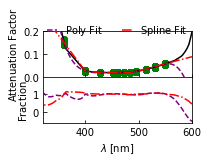

In [17]:
import matplotlib.cm as cm
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(std_size, std_size * 6. / 8.),
                                  sharex=True, gridspec_kw = {'wspace':0, 'hspace':0})
# ---------------------------------------------------------------
# Absolute values
for i, curr in enumerate(total_acce):
    if curr > 0.1:
        color='y'
        zorder = 10
    else:
        color='g'
        zorder=1
    ax1.scatter(wavelengths_inj,
             atten_err[i, :], c=color, zorder=zorder)
x_grid = np.linspace(300., 600., 100)
ax1.plot(x_grid,
         spl_atten(x_grid),
         color='k', lw=lw, zorder=100)
ax1.plot(x_grid, poly1d(x_grid), color='purple', lw=lw, zorder=101, ls='--', label=r'$\mathrm{Poly\;Fit}$')
ax1.plot(x_grid, spl_fit(x_grid), color='r', lw=lw, zorder=101, ls='-.', label=r'$\mathrm{Spline\;Fit}$')
# -------------------------------------------------------------
# Fraction
ax2.plot(x_grid, poly1d(x_grid) / spl_atten(x_grid), color='purple', lw=lw, zorder=101, ls='--')
ax2.plot(x_grid, spl_fit(x_grid) / spl_atten(x_grid), color='r', lw=lw, zorder=101, ls='-.')
# ------------------------------------------------------
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_ylabel(r'$\mathrm{Attenuation\;Factor}$', fontsize=fontsize)
ax2.set_xlabel(r'$\lambda\;[\mathrm{nm}]$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_ylabel(r'$\mathrm{Fraction}$', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# -------------------------------------------------------
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.35),
                  ncol=6, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
# -------------------------------------------------------
ax2.set_xlim(320., 600)
ax1.set_ylim(0., 0.2)
plt.tight_layout()
plt.show()
figure.savefig(PICS + "CL_Plot_v3.png",
               bbox_inches='tight')

In [18]:
# Plotting font
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

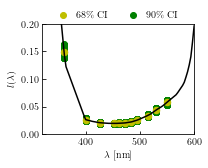

In [30]:
import matplotlib.cm as cm
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.))
# ---------------------------------------------------------------
# Absolute values
for i, curr in enumerate(total_acce):
    if curr > 0.1:
        color='y'
        zorder = 10
    else:
        color='g'
        zorder=1
    ax1.scatter(wavelengths_inj,
             atten_err[i, :], c=color, zorder=zorder)
ax1.scatter([200], [0.17], color='y', label=r'$68\%\;\mathrm{CI}$')
ax1.scatter([200], [0.17], color='g', label=r'$90\%\;\mathrm{CI}$')
ax1.scatter(wavelengths_inj,
         spl_atten(wavelengths_inj),
         color='y', lw=lw, zorder=10)
x_grid = np.linspace(300., 600., 100)
ax1.plot(x_grid,
         spl_atten(x_grid),
         color='k', lw=lw, zorder=100)
# ------------------------------------------------------
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_ylabel(r'$l(\lambda)$', fontsize=fontsize)
ax1.set_xlabel(r'$\lambda\;[\mathrm{nm}]$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# -------------------------------------------------------
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=6, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.4, +1),
                  ncol=1, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# -------------------------------------------------------
ax1.set_xlim(320., 600)
ax1.set_ylim(0., 0.2)
plt.tight_layout()
plt.show()
figure.savefig(PICS + "Attenuation.png",
               bbox_inches='tight', dpi=500)